# Clase 1

Reconstrucción del *ipynb* a partir del PDF subido por el profesor.


## Estimación de integrales por Monte Carlo

Sea $U\sim\mathrm{Unif}(0,1)$ y sea $x=a+(b-a)U$. Para una función $f$, se cumple
$$
\int_a^b f(x)\,dx = (b-a)\,\mathbb{E}\big[f\big(a+(b-a)U\big)\big].
$$

Ejemplo con $f(x)=e^{x+x^2}$ en $[a,b]=[-2,2]$:


In [1]:
import numpy as np  # libreria numpy

def h(u, a, b):
    # f(x) = exp(x + x^2), con x = a + (b-a)u
    x = a + (b - a) * u
    y = (b - a) * np.exp(x + x**2)
    return y

# Parámetros y simulación
k = 10_000
a = -2
b =  2
u = np.random.random(k)

# Estimación de la integral
estimacion_integral = h(u, a, b).mean()
estimacion_integral

np.float64(91.62995407860306)

## Estimación de $\pi$ por Monte Carlo (método del área)

Muestrear puntos $(X,Y)$ uniformes en el cuadrado $[-1,1]^2$. La fracción que cae en el disco unidad $X^2+Y^2\le1$ aproxima $\pi/4$.


In [2]:
k = 10_000
contador = 0
for _ in range(k):
    u1 = np.random.random()
    u2 = np.random.random()
    if (2*u1 - 1)**2 + (2*u2 - 1)**2 <= 1:
        contador += 1

pi_hat = 4 * contador / k
pi_hat

3.1692

In [30]:
# Nube de puntos dentro/fuera del disco unidad
x_dentro = []
y_dentro = []
x_fuera = []
y_fuera = []

for _ in range(k):
    u1 = np.random.random()
    u2 = np.random.random()
    x = 2*u1 - 1
    y = 2*u2 - 1
    if x**2 + y**2 <= 1:
        x_dentro.append(x); y_dentro.append(y)
    else:
        x_fuera.append(x); y_fuera.append(y)

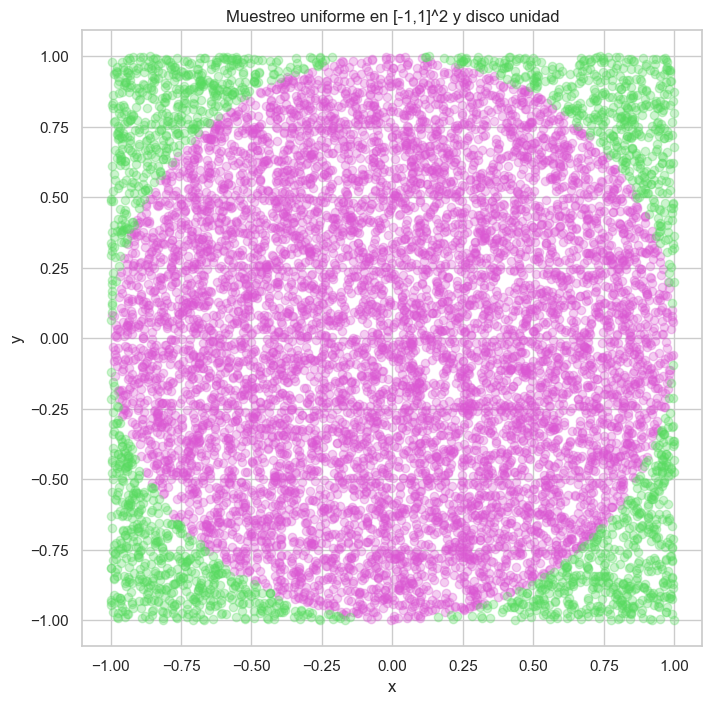

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

tab10 = sns.color_palette("hls")
np.random.shuffle(tab10)
sns.set(style="whitegrid", context="notebook", palette=tab10)

plt.figure(figsize=(8, 8))
plt.scatter(x_dentro, y_dentro, alpha=0.3)
plt.scatter(x_fuera, y_fuera, alpha=0.3)     # puntos fuera
plt.title("Muestreo uniforme en [-1,1]^2 y disco unidad")
plt.xlabel("x"); plt.ylabel("y")
plt.axis("equal")
plt.show()